In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lplenka/malicious-server-hack")

print("Path to dataset files:", path)

100%|██████████| 583k/583k [00:00<00:00, 1.33MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lplenka/malicious-server-hack/versions/5


In [ ]:
import os

os.listdir(path)

['Train.csv', 'Test.csv', 'sample_submission.csv']

In [ ]:
import pandas as pd

original_df = pd.read_csv(os.path.join(path, "Train.csv"))
original_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INCIDENT_ID        23856 non-null  object 
 1   DATE               23856 non-null  object 
 2   X_1                23856 non-null  int64  
 3   X_2                23856 non-null  int64  
 4   X_3                23856 non-null  int64  
 5   X_4                23856 non-null  int64  
 6   X_5                23856 non-null  int64  
 7   X_6                23856 non-null  int64  
 8   X_7                23856 non-null  int64  
 9   X_8                23856 non-null  int64  
 10  X_9                23856 non-null  int64  
 11  X_10               23856 non-null  int64  
 12  X_11               23856 non-null  int64  
 13  X_12               23674 non-null  float64
 14  X_13               23856 non-null  int64  
 15  X_14               23856 non-null  int64  
 16  X_15               238

In [ ]:
original_df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [ ]:
df = original_df.copy()

In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"], format="%d-%b-%y")

# Crear nuevas columnas
df["DAY"] = df["DATE"].dt.day
df["MONTH"] = df["DATE"].dt.month
df["YEAR"] = df["DATE"].dt.year

In [ ]:
df.drop("DATE", axis=1, inplace=True)
df.drop("INCIDENT_ID", axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
X_1,0
X_2,0
X_3,0
X_4,0
X_5,0
X_6,0
X_7,0
X_8,0
X_9,0
X_10,0


In [ ]:
df.dtypes

,0
X_1,int64
X_2,int64
X_3,int64
X_4,int64
X_5,int64
X_6,int64
X_7,int64
X_8,int64
X_9,int64
X_10,int64


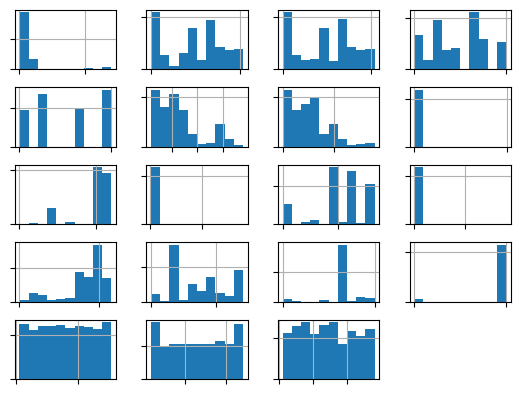

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

ax = df.hist()

for axis in ax.flatten():
    axis.set_title('')
    axis.set_xticklabels([])
    axis.set_yticklabels([])

pyplot.show()

In [ ]:
from collections import Counter

mo = df['MALICIOUS_OFFENSE'].values
counter = Counter(mo)

for c, v in counter.items():
    percentage = v / len(mo) * 100
    print(f"{c}: {v} ({percentage:.2f}%)")

0: 1068 (4.48%)
1: 22788 (95.52%)


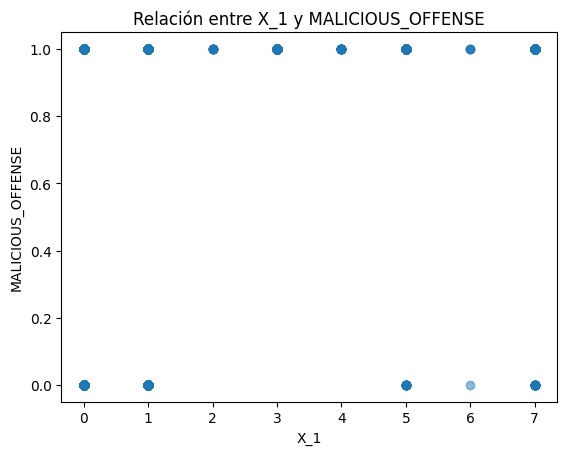

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(original_df["X_1"], original_df["MALICIOUS_OFFENSE"], alpha=0.5)
plt.xlabel("X_1")
plt.ylabel("MALICIOUS_OFFENSE")
plt.title("Relación entre X_1 y MALICIOUS_OFFENSE")
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std


def evaluate(X, y, model, n_splits=5, n_repeats=3):
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    metric = make_scorer(geometric_mean_score, average="macro")
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    print('Mean: %.3f' % mean(scores))
    print('Standard Deviation: %.3f' % std(scores))
    return scores


def build_pipeline(X):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    column_tr = ColumnTransformer(
        transformers=[
            ("im", SimpleImputer(strategy="mean"), num_cols),
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        ]
    )

    pipeline = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', DummyClassifier(strategy="uniform", random_state=42))
    ])

    return pipeline

def split_dataset(df):
    X = df.drop("MALICIOUS_OFFENSE", axis=1)
    y = df["MALICIOUS_OFFENSE"]
    return X, y

In [ ]:
X, y = split_dataset(df)
pipeline = build_pipeline(X)
scores = evaluate(X, y, pipeline)

Mean: 0.499
Standard Deviation: 0.017


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def retrieve_models(X):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # pipeline numéricas
    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # pipeline categóricas
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # combinar en ColumnTransformer
    column_tr = ColumnTransformer(
        transformers=[
            ("num", num_transformer, num_cols),
            ("cat", cat_transformer, cat_cols)
        ]
    )

    models = dict()
    models['LR'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs"))
    ])
    models['LDA'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LinearDiscriminantAnalysis())
    ])
    models['RF'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', RandomForestClassifier(random_state=42, n_estimators=1000))
    ])
    models['GB'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    models['SVC'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', SVC(random_state=42))
    ])
    models['NB'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GaussianNB())
    ])

    return models

In [ ]:
models = retrieve_models(X)

Mean: 0.546
Standard Deviation: 0.009
LR: 0.54609398933129 0.008767662740435028
Mean: 0.583
Standard Deviation: 0.016
LDA: 0.5833731093933363 0.01604123590921248
Mean: 0.928
Standard Deviation: 0.015
RF: 0.9275027448332516 0.014892990185422754
Mean: 0.989
Standard Deviation: 0.003
GB: 0.9890907072205956 0.002565060046888029
Mean: 0.730
Standard Deviation: 0.017
SVC: 0.7296226252412794 0.01667068393116356
Mean: 0.559
Standard Deviation: 0.014
NB: 0.558853357228319 0.014116454540852655


/tmp/ipython-input-342978130.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=models.keys(), showmeans=True)


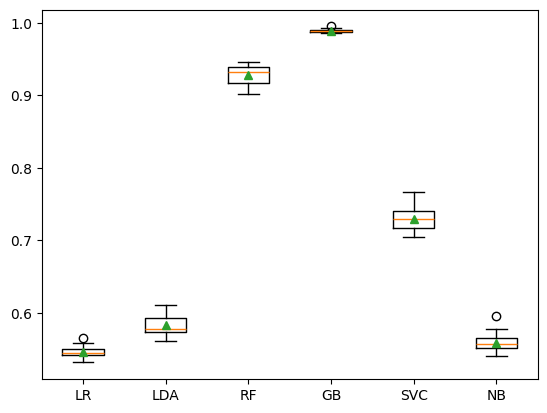

In [ ]:
results = list()

for key, value in models.items():
    scores = evaluate(X, y, value)
    results.append(scores)
    print(f"{key}: {mean(scores)} {std(scores)}")

pyplot.boxplot(results, labels=models.keys(), showmeans=True)
pyplot.show()

# GradientBoostingClassifier seems the best model so far

In [ ]:
from imblearn.under_sampling import (
    TomekLinks,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    OneSidedSelection,
    NeighbourhoodCleaningRule
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    BorderlineSMOTE,
    ADASYN
)

def retrieve_undersampling_oversampling_techniques():
    techniques = {
        # =======================
        # UNDERSAMPLING
        # =======================
        "TomekLinks": TomekLinks(),
        "ENN": EditedNearestNeighbours(),
        "RENN": RepeatedEditedNearestNeighbours(),
        "OSS": OneSidedSelection(),
        "NCR": NeighbourhoodCleaningRule(),

        # =======================
        # OVERSAMPLING
        # =======================
        "RandomOverSampler": RandomOverSampler(),
        "SMOTE": SMOTE(),
        "BorderlineSMOTE": BorderlineSMOTE(),
        "ADASYN": ADASYN(),
    }

    return techniques

In [ ]:
techniques = retrieve_undersampling_oversampling_techniques()

Mean: 0.990
Standard Deviation: 0.003
>TomekLinks 0.990 (0.003)
Mean: 0.991
Standard Deviation: 0.004
>ENN 0.991 (0.004)
Mean: 0.992
Standard Deviation: 0.003
>RENN 0.992 (0.003)
Mean: 0.990
Standard Deviation: 0.004
>OSS 0.990 (0.004)
Mean: 0.991
Standard Deviation: 0.005
>NCR 0.991 (0.005)
Mean: 0.995
Standard Deviation: 0.002
>RandomOverSampler 0.995 (0.002)
Mean: 0.994
Standard Deviation: 0.003
>SMOTE 0.994 (0.003)
Mean: 0.994
Standard Deviation: 0.003
>BorderlineSMOTE 0.994 (0.003)
Mean: 0.994
Standard Deviation: 0.003
>ADASYN 0.994 (0.003)


/tmp/ipython-input-1374974488.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=techniques.keys(), showmeans=True)


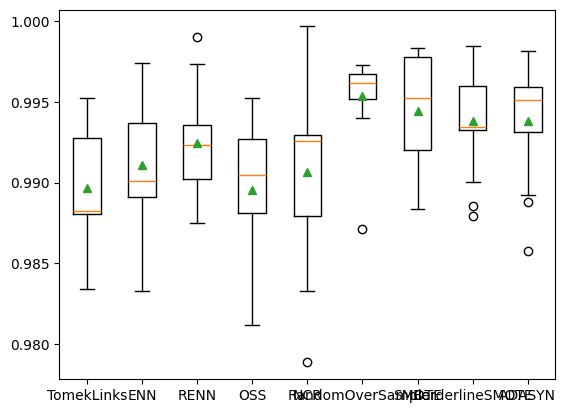

In [ ]:
results = []

for key, value in techniques.items():
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # pipeline numéricas
    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # pipeline categóricas
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # combinar en ColumnTransformer
    column_tr = ColumnTransformer(
        transformers=[
            ("num", num_transformer, num_cols),
            ("cat", cat_transformer, cat_cols)
        ]
    )
    pipeline = ImbPipeline([
        ('prep', column_tr),
        ('technique', value),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (key, mean(scores), std(scores)))

pyplot.boxplot(results, labels=techniques.keys(), showmeans=True)
pyplot.show()

# We can use SMOTE, ADASYN or RandomOverSampler, but to avoid inconsistencies we will use ADASYN or SMOTE

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

def build_final_pipeline(X):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # pipeline numéricas
    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # pipeline categóricas
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # combinar en ColumnTransformer
    column_tr = ColumnTransformer(
        transformers=[
            ("num", num_transformer, num_cols),
            ("cat", cat_transformer, cat_cols)
        ]
    )

    calibrated_model = CalibratedClassifierCV(estimator=GradientBoostingClassifier(random_state=42), method="isotonic", cv=3)

    pipeline = ImbPipeline([
        ('prep', column_tr),
        ('technique', techniques['ADASYN']),
        ('model', calibrated_model)
    ])

    scores = evaluate(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (key, mean(scores), std(scores)))

    return pipeline

In [ ]:
pipeline = build_final_pipeline(X)

Mean: 0.992
Standard Deviation: 0.004
>ADASYN 0.992 (0.004)


In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('im', SimpleImputer(),
                                                  Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('model',
                 DummyClassifier(random_state=42, strategy='uniform'))])

In [ ]:
original_tdf = pd.read_csv(os.path.join(path, "Test.csv"))
original_tdf.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [ ]:
tdf = original_tdf.copy()
tdf["DATE"] = pd.to_datetime(tdf["DATE"], format="%d-%b-%y")

# Crear nuevas columnas
tdf["DAY"] = tdf["DATE"].dt.day
tdf["MONTH"] = tdf["DATE"].dt.month
tdf["YEAR"] = tdf["DATE"].dt.year

In [ ]:
tdf.drop("DATE", axis=1, inplace=True)
tdf.drop("INCIDENT_ID", axis=1, inplace=True)

In [ ]:
predictions = pipeline.predict(tdf)

In [ ]:
from collections import Counter

counter = Counter(predictions)

for c, v in counter.items():
    percentage = v / len(mo) * 100
    print(f"{c}: {v} ({percentage:.2f}%)")

0: 8004 (33.55%)
1: 7899 (33.11%)
